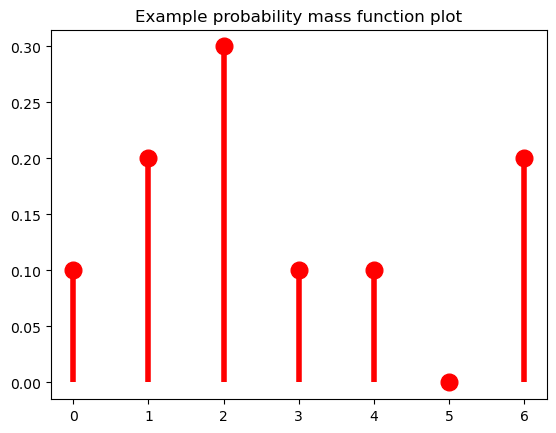

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
custm = stats.rv_discrete(name="custm", values=(xk, pk))
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), "ro", ms=12, mec="r")
ax.vlines(xk, 0, custm.pmf(xk), colors="r", lw=4)
plt.title("Example probability mass function plot")
plt.show()

In [2]:
import numpy as np
from faiss.contrib.evaluation import knn_intersection_measure
import faiss
import sys

#sys.path.append("/data/home/marialomeli/faiss_improvements/offline_ivf/") #aws

sys.path.append("/data/home/marialomeli/faiss_improvements/offline_ivf/")
#from utils import get_intersection_cardinality_frequencies


class Object(object):
    pass


self = Object()
self.root = "/checkpoint/marialomeli/offline_faiss/contriever/"

self.eval_dir = self.root + "/hcir-1tb_in_hcir-1tb/eval"
# self.index_factory_fn = 'OPQ64_IVF65536_PQ64' #baseline TBD

self.k = 50
index_strings = [
   # 'IVF32768_PQ64',
   # "OPQ64_IVF32768_PQ64",
#'IVF32768_PQ128',
   # "OPQ128_IVF32768_PQ128",
   # "OPQ256_IVF32768_PQ256",
     "IVF32768_PQ256",
   # "OPQ512_IVF32768_PQ512",
   "IVF32768_PQ384",
   "IVF32768_SQ8"
]
colors = ["g", "b", "r", "m", "y", "c"]  #'k' for baseline
I_a_gt_file = f"{self.eval_dir}/I_a_gt.npy"
I_a_gt = np.load(I_a_gt_file)
all_knn = []
nprobes = [2**p for p in range(8)]
for index_factory_fn in index_strings:
    helper = []
    for nprobe in nprobes:
        I_a_ann_file = f"{self.eval_dir}/I_a_ann_{index_factory_fn}_np{nprobe}.npy"
        I_a_ann = np.load(I_a_ann_file)
        print(
            f"I_a_ann_{index_factory_fn}_np{nprobe}.npy knn intersection measure with nprobe {nprobe}: {knn_intersection_measure(I_a_gt, I_a_ann)}"
        )
        helper.append(knn_intersection_measure(I_a_gt, I_a_ann))
    all_knn.append(helper)

I_a_ann_IVF32768_PQ256_np1.npy knn intersection measure with nprobe 1: 0.043562
I_a_ann_IVF32768_PQ256_np2.npy knn intersection measure with nprobe 2: 0.055834
I_a_ann_IVF32768_PQ256_np4.npy knn intersection measure with nprobe 4: 0.072344
I_a_ann_IVF32768_PQ256_np8.npy knn intersection measure with nprobe 8: 0.091576
I_a_ann_IVF32768_PQ256_np16.npy knn intersection measure with nprobe 16: 0.115868
I_a_ann_IVF32768_PQ256_np32.npy knn intersection measure with nprobe 32: 0.146748
I_a_ann_IVF32768_PQ256_np64.npy knn intersection measure with nprobe 64: 0.185408
I_a_ann_IVF32768_PQ256_np128.npy knn intersection measure with nprobe 128: 0.231624
I_a_ann_IVF32768_PQ384_np1.npy knn intersection measure with nprobe 1: 0.044924
I_a_ann_IVF32768_PQ384_np2.npy knn intersection measure with nprobe 2: 0.057918
I_a_ann_IVF32768_PQ384_np4.npy knn intersection measure with nprobe 4: 0.075748
I_a_ann_IVF32768_PQ384_np8.npy knn intersection measure with nprobe 8: 0.09678
I_a_ann_IVF32768_PQ384_np16.npy

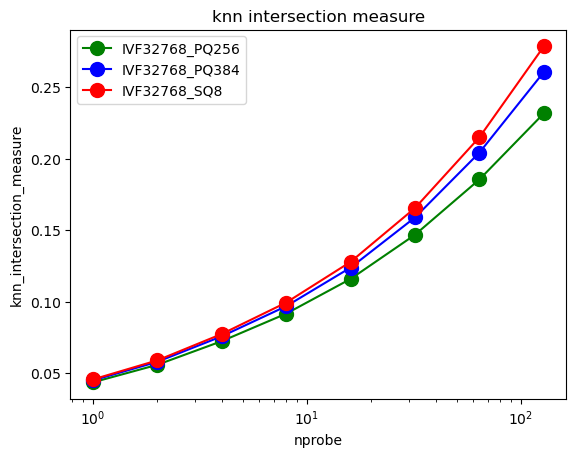

In [3]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

for i, knn in enumerate(all_knn):
    plt.plot(nprobes, knn, "o-", markersize=10, color=colors[i], label=index_strings[i])
plt.xscale("log")
plt.xlabel("nprobe")
plt.ylabel("knn_intersection_measure")
plt.savefig("logscale_knn_intesection_metric.pdf")
plt.title("knn intersection measure")
plt.legend()
plt.show()